[1] -0.6264538

-0.3241541


0.8342936


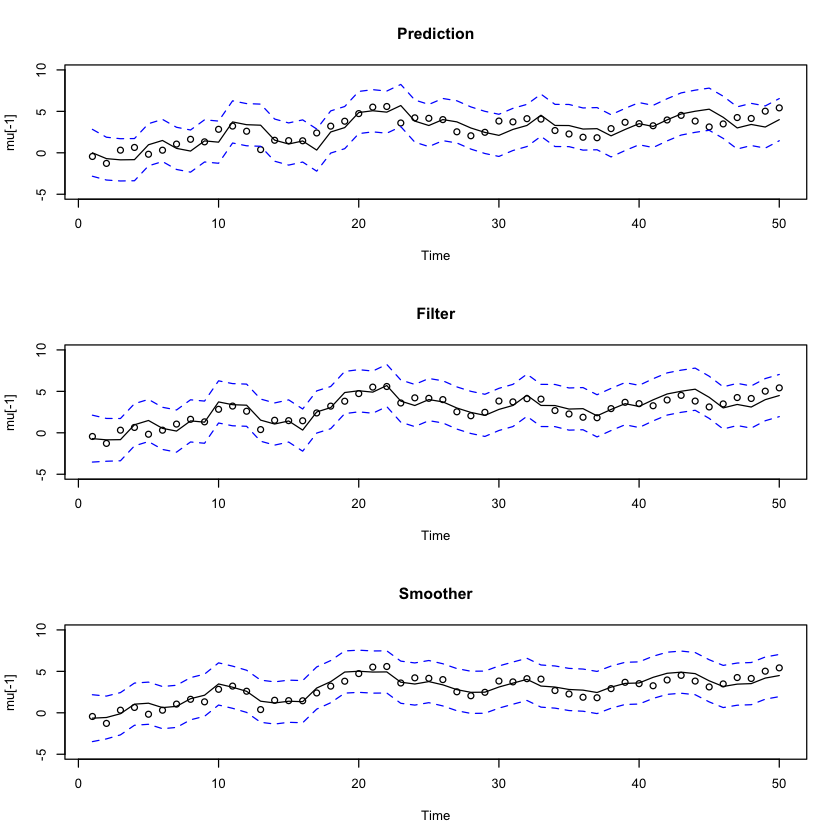

In [10]:
require(astsa)
# generate data
set.seed(1)
num = 50
w = rnorm(num+1,0,1)
v = rnorm(num,0,1)

# state: mu[0], mu[1], ..., mu[50] 
mu = cumsum(w) 
# obs  : y[1], ..., y[50]
# remember that vector[-1] it is equivalent to take away the first element of the vector 
y  = mu[-1] + v 
# filter and smooth
mu0    = 0
sigma0 = 1
phi    = 1
cQ     = 1
cR     = 1
ks     = Ksmooth0(num, y, 1, mu0, sigma0, phi, cQ, cR)
# start figure
par(mfrow=c(3,1))
Time   = 1:num   
plot(Time, mu[-1], main = 'Prediction', ylim=c(-5,10))
  lines(ks$xp)
  lines(ks$xp+2*sqrt(ks$Pp),lty='dashed',col='blue')
  lines(ks$xp-2*sqrt(ks$Pp),lty='dashed',col='blue')
plot(Time, mu[-1], main = 'Filter', ylim=c(-5,10))
  lines(ks$xf)
  lines(ks$xf+2*sqrt(ks$Pp),lty='dashed',col='blue')
  lines(ks$xf-2*sqrt(ks$Pp),lty='dashed',col='blue')
plot(Time, mu[-1], main = 'Smoother', ylim=c(-5,10))
  lines(ks$xs)
  lines(ks$xs+2*sqrt(ks$Pp),lty='dashed',col='blue')
  lines(ks$xs-2*sqrt(ks$Pp),lty='dashed',col='blue')

mu[1]
ks$x0n
sqrt(ks$P0n)